In [4]:
# imports
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [5]:
# data processing
data = pd.read_csv("dataset.csv") # dataset.csv has decimal values in status, helps train model better
df = pd.DataFrame(data)
df.head(10)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1.0,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1.0,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1.0,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1.0,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1.0,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,phon_R01_S01_6,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,...,0.06985,0.01222,21.378,1.0,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
6,phon_R01_S02_1,120.267,137.244,114.820,0.00333,0.00003,0.00155,0.00202,0.00466,0.01608,...,0.02337,0.00607,24.886,1.0,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
7,phon_R01_S02_2,107.332,113.840,104.315,0.00290,0.00003,0.00144,0.00182,0.00431,0.01567,...,0.02487,0.00344,26.892,1.0,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755
8,phon_R01_S02_3,95.730,132.068,91.754,0.00551,0.00006,0.00293,0.00332,0.00880,0.02093,...,0.03218,0.01070,21.812,1.0,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
9,phon_R01_S02_4,95.056,120.103,91.226,0.00532,0.00006,0.00268,0.00332,0.00803,0.02838,...,0.04324,0.01022,21.862,1.0,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362


In [6]:
# check for empty values
df.isna().sum()

,0
name,0
MDVP:Fo(Hz),0
MDVP:Fhi(Hz),0
MDVP:Flo(Hz),0
MDVP:Jitter(%),0
MDVP:Jitter(Abs),0
MDVP:RAP,0
MDVP:PPQ,0
Jitter:DDP,0
MDVP:Shimmer,0


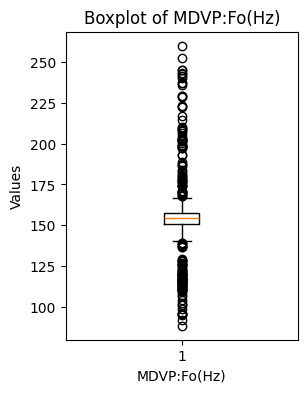

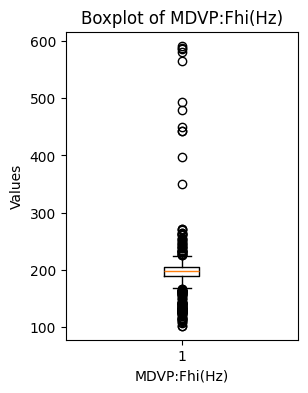

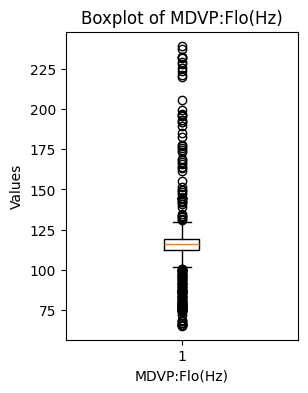

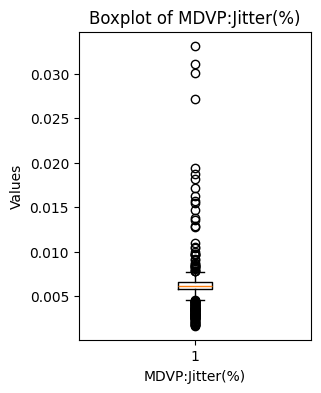

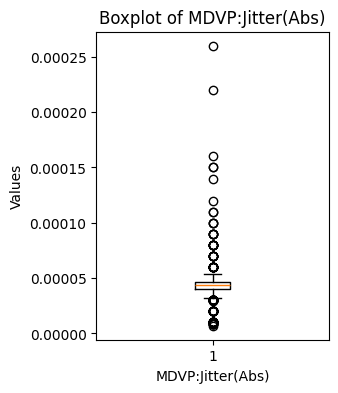

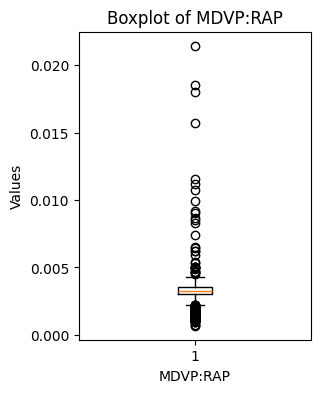

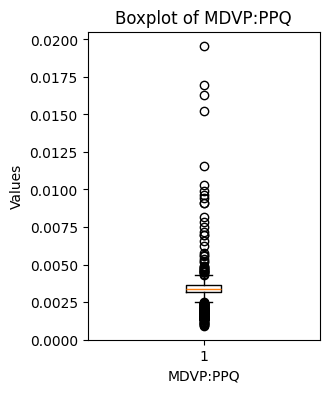

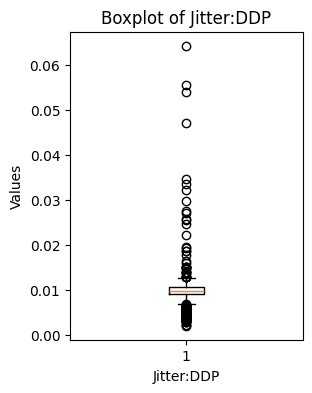

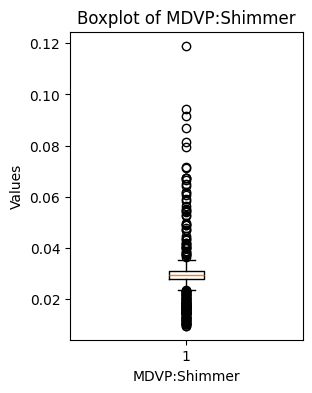

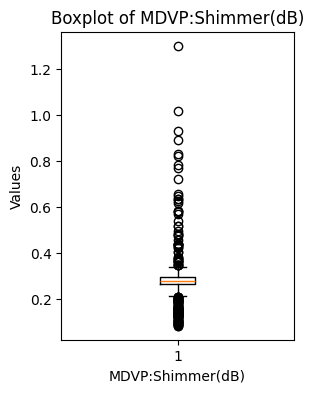

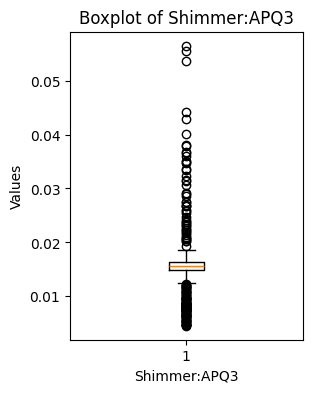

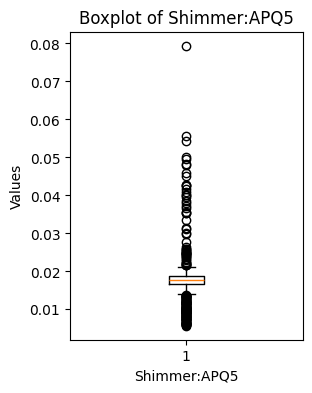

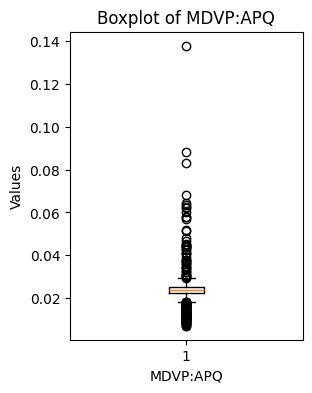

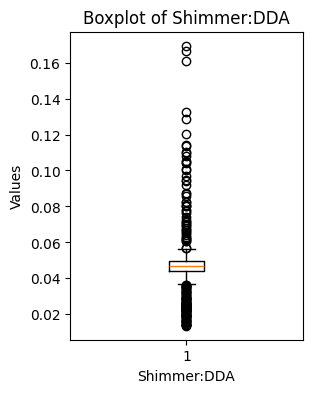

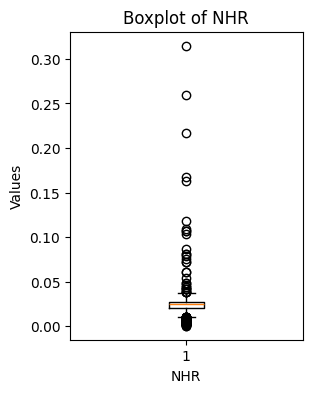

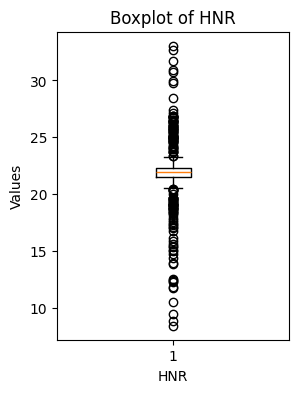

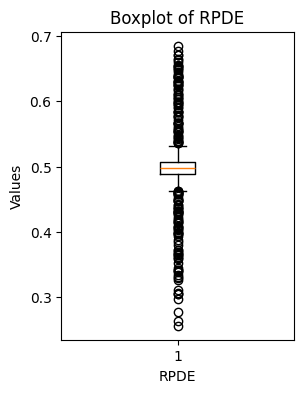

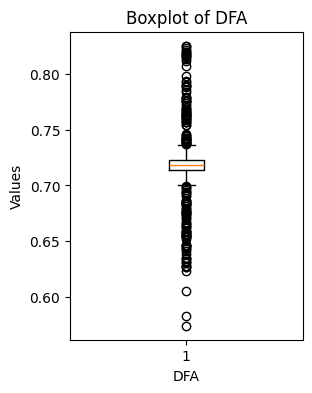

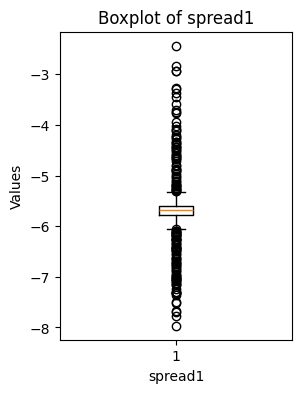

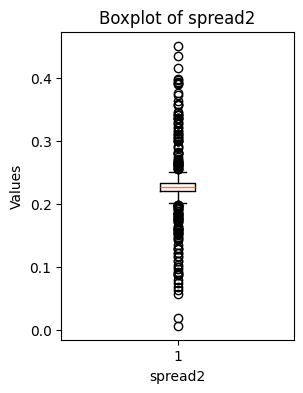

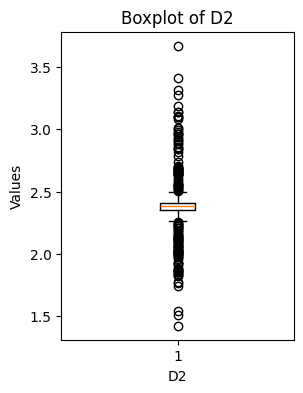

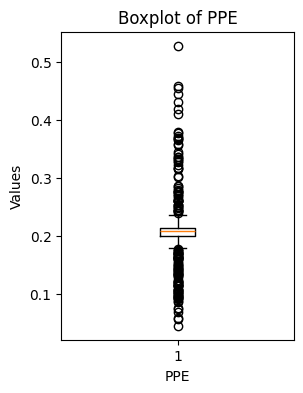

In [7]:
import matplotlib.pyplot as plt

for column in df.drop(columns=['status', 'name']).columns:
    plt.figure(figsize=(3, 4))  # Adjust the figure size as needed
    plt.boxplot(df[column])
    plt.title(f'Boxplot of {column}')
    plt.ylabel('Values')
    plt.xlabel(column)
    plt.show()

There are some outliers, so we will remove them.

In [8]:
import numpy as np
df.drop('name', axis=1, inplace=True) # forgot to do this and got an error
print(df.shape)
z = (df - df.mean())/df.std()
df = df[~((np.abs(z) > 3).any(axis=1))] # remove all rows with outlier values
df.shape

(1195, 23)


(1036, 23)

In [9]:
y = df['status']
X = df.drop('status', axis=1)

In [10]:
y.value_counts() # verifying that status is always either 0 or 1

,count
status,
1.000000,36
0.799541,1
0.734946,1
0.743590,1
0.772728,1
...,...
0.740938,1
0.758922,1
0.722024,1


<Axes: >

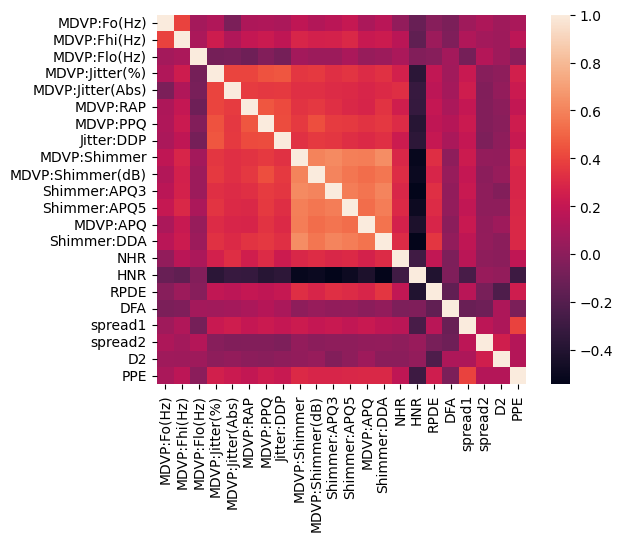

In [11]:
import seaborn as sns

corr_matrix = X.corr()
sns.heatmap(corr_matrix, vmax= 1, square=True)

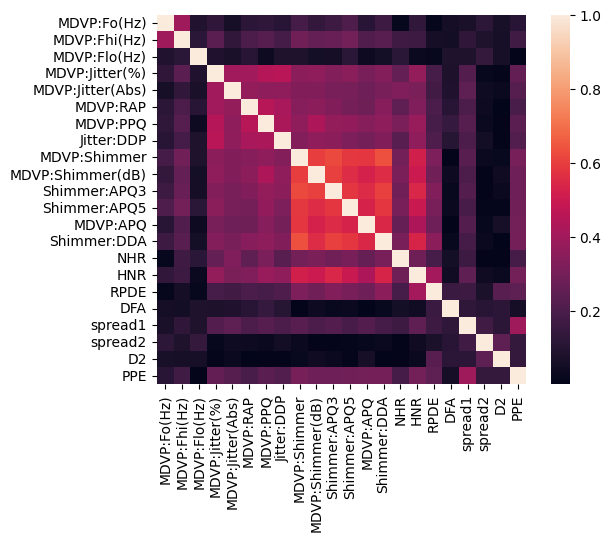

In [12]:
corr_matrix = corr_matrix.abs()
to_drop = []
cols = corr_matrix.columns
for i in range(len(cols)):
  for j in range(i+1, len(cols)):
    if corr_matrix[cols[i]][cols[j]]> 0.9: # any features that have correlation 0.9 or above with any other feature
      to_drop.append(cols[i])
      break
corr_matrix.drop(columns=to_drop, inplace=True)
corr_matrix.drop(index=to_drop, inplace=True)
sns.heatmap(corr_matrix, vmax= 1, square=True)
X = X[corr_matrix.columns] # only keep lower correlation features

We will proceed with the features that are not highly correlated to each other. this will ensure that our models only take features that provide unique information about the patient (the features are somewhat independent of each other).

In [17]:
# data splits
scaler = MinMaxScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#fit and predicct
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# accuracy
print(mean_squared_error(y_test, y_pred))

0.002721346927690177


Linear Regression model is performing well, let's see if we can improve our MSE

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import SGD
!pip install scikeras
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.callbacks import EarlyStopping

def create_model(regularization=0.01, learning_rate=0.01, dropout_rate=0.2,num_layers=2, num_neurons=12):
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1],)))
    for i in range(num_layers): # adding all hidden layers
        model.add(Dense(num_neurons, activation='relu', kernel_regularizer=l2(regularization))) # hidden layer
        model.add(Dropout(dropout_rate)) # dropout layer
    model.add(Dense(1, activation='linear')) # testing different activation functions
    optimizer = SGD(learning_rate=learning_rate, momentum=0.1)
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mse'])
    return model

param_grid = {
    'model__num_layers': [1, 2, 4],
    'model__num_neurons': [X_train.shape[1], 2*X_train.shape[1]],
    'model__regularization': [0.1, 0.5], # noticed overfitting, made these values larger
    'model__learning_rate': [0.01, 0.05],
    'model__dropout_rate': [0.2, 0.5],
    'batch_size': [32, 64],
}
model = KerasRegressor(model=create_model, verbose=0, epochs=100)
# grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, verbose=2)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
grid_result = grid.fit(X_train, y_train, callbacks=[early_stopping])


print("\nBest Hyperparameters:", grid_result.best_params_)

Fitting 3 folds for each of 96 candidates, totalling 288 fits
[CV] END batch_size=32, model__dropout_rate=0.2, model__learning_rate=0.01, model__num_layers=1, model__num_neurons=22, model__regularization=0.1; total time=   8.8s
[CV] END batch_size=32, model__dropout_rate=0.2, model__learning_rate=0.01, model__num_layers=1, model__num_neurons=22, model__regularization=0.1; total time=  18.0s
[CV] END batch_size=32, model__dropout_rate=0.2, model__learning_rate=0.01, model__num_layers=1, model__num_neurons=22, model__regularization=0.1; total time=  16.4s
[CV] END batch_size=32, model__dropout_rate=0.2, model__learning_rate=0.01, model__num_layers=1, model__num_neurons=22, model__regularization=0.5; total time=   9.8s
[CV] END batch_size=32, model__dropout_rate=0.2, model__learning_rate=0.01, model__num_layers=1, model__num_neurons=22, model__regularization=0.5; total time=   7.2s
[CV] END batch_size=32, model__dropout_rate=0.2, model__learning_rate=0.01, model__num_layers=1, model__num_

[CV] END batch_size=64, model__dropout_rate=0.2, model__learning_rate=0.01, model__num_layers=1, model__num_neurons=22, model__regularization=0.1; total time=   5.5s
[CV] END batch_size=64, model__dropout_rate=0.2, model__learning_rate=0.01, model__num_layers=1, model__num_neurons=22, model__regularization=0.1; total time=   6.3s
[CV] END batch_size=64, model__dropout_rate=0.2, model__learning_rate=0.01, model__num_layers=1, model__num_neurons=22, model__regularization=0.5; total time=   5.6s
[CV] END batch_size=64, model__dropout_rate=0.2, model__learning_rate=0.01, model__num_layers=1, model__num_neurons=22, model__regularization=0.5; total time=   6.0s
[CV] END batch_size=64, model__dropout_rate=0.2, model__learning_rate=0.01, model__num_layers=1, model__num_neurons=22, model__regularization=0.5; total time=   7.4s
[CV] END batch_size=64, model__dropout_rate=0.2, model__learning_rate=0.01, model__num_layers=1, model__num_neurons=44, model__regularization=0.1; total time=   6.3s
[CV]

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,



Best Hyperparameters: {'batch_size': 64, 'model__dropout_rate': 0.2, 'model__learning_rate': 0.05, 'model__num_layers': 1, 'model__num_neurons': 22, 'model__regularization': 0.1}


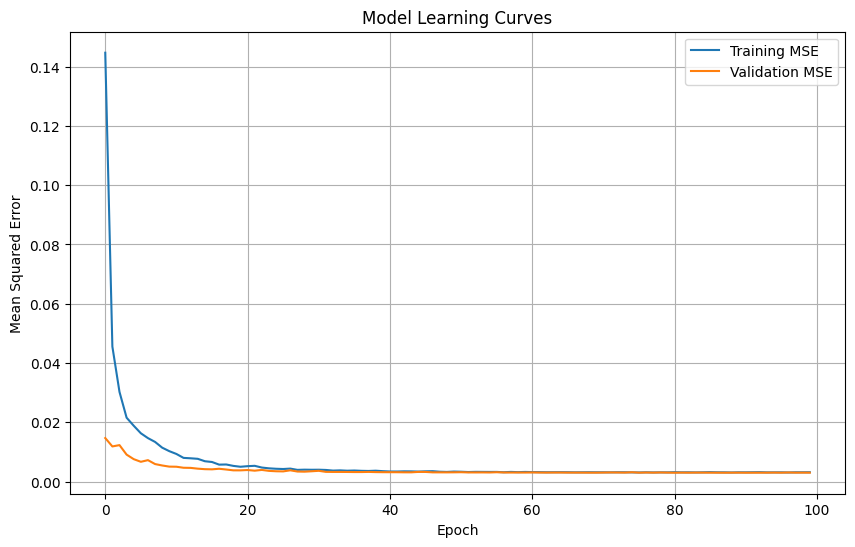

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
0.003011500074092784


In [16]:
best_params = grid_result.best_params_
best_model = create_model(regularization=best_params['model__regularization'], learning_rate=best_params['model__learning_rate'], dropout_rate=best_params['model__dropout_rate'], num_layers=best_params['model__num_layers'], num_neurons=best_params['model__num_neurons'])
history = best_model.fit(X_train, y_train, batch_size=best_params['batch_size'], epochs=100, validation_data=(X_test, y_test),verbose=0)

# plot the learning curves
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(history.history['mse'], label='Training MSE')
plt.plot(history.history['val_mse'], label='Validation MSE')
plt.title('Neural Network Learning Curves')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid()
plt.show()

y_pred = best_model.predict(X_test) # same as with regression, let's see if the error is better
# accuracy
print(mean_squared_error(y_test, y_pred))

Funnily enough, the MSE from the Linear Regression model is slightly lower than this one, but both models are performing extremely well.

We will implement one final model, an SVM (Support Vector Machine). In our research, most people who studied Parkison's and built ML models used this method, so we wanted to implement it ourselves as well.

The model works by using higher dimensions to find optimal splits between classes of data (unsupervised ML, similar to K-means clustering).

In [29]:
from sklearn.svm import SVR
# To use SVC, we need a discrete y variable, and all of our y values are greater than 0.5.
# It is not in our best interest to determine a good cutoff value, so we will proceed with just an SVR

param_grid = {'C': [0.1, 1, 10], 'epsilon': [1, 0.1, 0.01]} # default kernel (rbf) is already the one we want to use, so no need to specify it
grid = GridSearchCV(estimator=SVR(), param_grid=param_grid, cv=4) # more folds because less combinations of params
grid_result = grid.fit(X_train, y_train)

best_params = grid_result.best_params_
best_model = SVR(C=best_params['C'], epsilon=best_params['epsilon'])
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

# accuracy
print(mean_squared_error(y_test, y_pred))

0.0019050075312019598


This is the lowest MSE value so far, so this model is performing the best out of the 3.

Now to download the model and save it to a file through Google Colab via pickle

In [ ]:
with open('model.pkl', 'wb') as file:
    pickle.dump(best_model, file)
    
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)